# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from collections import Counter
from matplotlib.pylab import savefig

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

## Load file and create dataframe

In [3]:
folder = './'

csv = 'Bidirectional_haptics_new.csv'

In [4]:
answers_df = pd.read_csv(os.path.join(folder, csv))

answers_df_sim = answers_df.iloc[[0,1,2,3,4,5,6,7,8]]
answers_df_sim

,Timestamp,Subject n°,Age,Gender,Which interface was easier to use for the task?,Which interface did you prefer?,How useful was the haptic inteface?,Why?,Please give your personal feedback/impressions
0,2020/02/20 11:11:14 am CET,2,27,Male,Wearable,Wearable,8,Given that there were no specific fiducials on...,Very interesting experiment! It would be worth...
1,2020/02/20 11:53:16 am CET,3,22,Male,Remote,Wearable,7,hepls to know when zou are close to an obstacl...,"Reallz good experiment, well conducted, instru..."
2,2020/02/20 2:41:54 pm CET,4,21,Male,Wearable,Wearable,10,It can help feeling where the obstacles are wh...,It is really comfortable and easier to fly wit...
3,2020/02/20 4:01:42 pm CET,5,31,Male,Wearable,Wearable,10,in some of the tasks there is no way of accomp...,Maybe more motors could give an even better ex...
4,2020/02/20 4:59:55 pm CET,6,21,Male,Remote,Wearable,8,Helps evaluating how far is the obstacle from ...,The haptics is very usefull but it is difficul...
5,2020/02/24 7:19:34 pm CET,1,30,Male,Wearable,Wearable,10,"Better distance perception, more fun",...
6,2020/02/24 7:20:32 pm CET,7,23,Male,Wearable,Wearable,10,The haptics interface helps preventing collisi...,...
7,2020/02/24 7:20:58 pm CET,8,30,Male,Wearable,Wearable,9,Easier to avoid obstacles,...
8,2020/02/24 7:22:16 pm CET,9,26,Female,Wearable,Wearable,10,The glove is an engaging and fun solution for ...,...


## Separate questions

In [5]:
data_sim = {}


age = 'Age'
gender = 'Gender'
easier = 'Which interface was easier to use for the task?'
haptics = 'How useful was the haptic inteface?'
prefered = 'Which interface did you prefer?'
why = 'Why?'
feedback = 'Please give your personal feedback/impressions'

questions = [age, gender, easier, haptics, prefered, why, feedback]

for q in questions:
    data_sim[q] = answers_df_sim[q].values

## Compute mean and average

In [6]:
def compute_stats(data):

    stats = {}

    mean_index = 0
    std_index = 1

    for q in [age]:
        stats[q] = [0, 0]
        stats[q][mean_index] = np.mean(data[q])
        stats[q][std_index] = np.std(data[q])

    print(stats)
    
    return stats

stats_sim = compute_stats(data_sim)

{'Age': [25.666666666666668, 3.829708431025353]}


## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

[8, 8, 7, 10, 10, 10, 10, 10, 9]
9.11111111111111


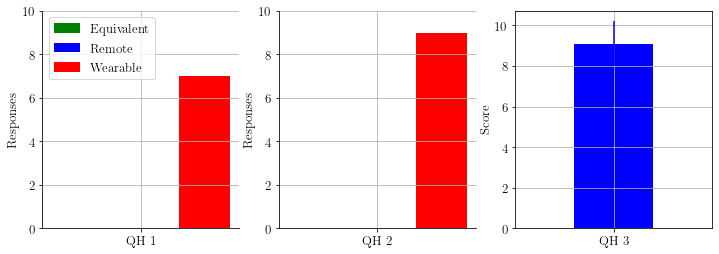

In [7]:
resp_data = {}

resp_data[easier] = Counter(data_sim[easier])
resp_data[prefered] = Counter(data_sim[prefered])

resp_data[easier]['Equivalent'] = 0
resp_data[easier]['Remote'] = 0
resp_data[prefered]['Equivalent'] = 0
resp_data[prefered]['Remote'] = 0

c1 = 'g'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

qs = ['QH 1', 'QH 2']

fig = plt.figure(figsize = (12,4))
for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 3, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        plt.bar(1+idx, resp[idx], label = i, color = c[idx])

    if jdx==0:
        plt.legend(loc = 'upper left')  
    plt.grid()    
    plt.ylim(0,10)
    plt.xticks([2], [qs[jdx]])
    plt.ylabel('Responses')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
resp_data[haptics] = Counter(data_sim[haptics])
hapt_resp = []
for i in resp_data[haptics]:
    hapt_resp.extend([i]*resp_data[haptics][i])
    
print(hapt_resp)

ax = fig.add_subplot(1, 3, 3)

ax.bar(1, np.mean(hapt_resp), yerr = np.std(hapt_resp), color = 'b', ecolor = 'b')
plt.xlim(0,2)
plt.xticks([1], ['QH 3'])
plt.ylabel('Score')
plt.grid()   

savefig('hapt_quest.pdf', bbox_inches='tight')

print(np.mean(hapt_resp))

In [8]:
print(resp_data[easier])
print(resp_data[haptics])
print(resp_data[prefered])

Counter({'Wearable': 7, 'Remote': 0, 'Equivalent': 0})
Counter({10: 5, 8: 2, 7: 1, 9: 1})
Counter({'Wearable': 9, 'Equivalent': 0, 'Remote': 0})


# Questionnaire

In [9]:
why_answers = data_sim[why]

print('SIMULATION')
print('-----------')
print(why)
print('-----------')
print()

for w in why_answers:
    print(w)
    print()
    
print('-----------')
print(feedback)
print('-----------')
print()

feed_answers = data_sim[feedback]

for f in feed_answers:
    print(f)
    print()

SIMULATION
-----------
Why?
-----------

Given that there were no specific fiducials on the obstacle surface, it was extremely difficult  to ascertain the position of the robot relative to the obstacle. The difficulty was compunded for the remote controller because its sensitivity made it very hard to make gradual, gentle movements. On the other hand, the wearable interface without haptics was much better at making gradual movements. However, the problem of determining the relative position of the drone to the obstacle was not resolved until haptic feedback was provided.  

hepls to know when zou are close to an obstacle and then to adapt the control to be more accurate. If zou approaching to fast, zou do not have time to integrate the vibrations and adapt the control.

It can help feeling where the obstacles are when you cannot see them and it is then really useful to avoid them.

in some of the tasks there is no way of accomplishing without it

Helps evaluating how far is the obstacl

# Backup - pie charts

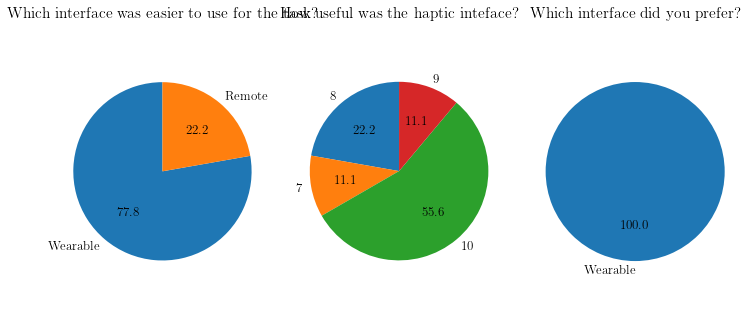

In [10]:
def plot_pies(data):
    
    plt.figure(figsize = (12,12))

    gender_pie_data = Counter(data[gender])
    easier_pie_data = Counter(data[easier])
    haptics_useful_pie_data = Counter(data[haptics])
    prefered_pie_data = Counter(data[prefered])

#     ax1 = plt.subplot(221)
#     ax1.pie(gender_pie_data.values(), labels=gender_pie_data.keys(), autopct='%1.1f%%', startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax1.set_title(gender)

    ax1 = plt.subplot(231)
    ax1.pie(easier_pie_data.values(), labels=easier_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(easier)

    ax1 = plt.subplot(232)
    ax1.pie(haptics_useful_pie_data.values(), labels=haptics_useful_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(haptics)

    ax1 = plt.subplot(233)
    ax1.pie(prefered_pie_data.values(), labels=prefered_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(prefered)

    plt.show()
    
plot_pies(data_sim)

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from statistics import print_p

## Load file and create dataframe

In [12]:
folder = '.'

files = os.listdir(folder)

csv_1 = 'NASA_haptics_new.csv'
csv_2 = 'NASA_haptics_new copy.csv'
csv_3 = 'NASA_haptics_new copy 2.csv'

In [13]:
answers_df_1 = pd.read_csv(os.path.join(folder, csv_1))
answers_df_2 = pd.read_csv(os.path.join(folder, csv_2))
answers_df_3 = pd.read_csv(os.path.join(folder, csv_3))

answers_df = pd.concat([answers_df_1, answers_df_2, answers_df_3])


# Separate hardware and simulation experiments
answers_df_hw = answers_df[answers_df['subject number'] >= 100]
answers_df = answers_df[answers_df['subject number'] < 100]

## Separate dataframe depending on interface/run

In [14]:
types = ['remote', 'motion_NH', 'motion']

# Separate answers depending on interface and run
answers = {}
answers[types[0]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[1]] = answers_df[answers_df['Interface'] == 'Motion - no haptics']
answers[types[2]] = answers_df[answers_df['Interface'] == 'Motion']

## Separate questions

In [15]:
data = {}

mentally_demanding = 'How mentally demanding was the test?'
physically_demanding = 'How physically demanding was the test?'
pace = 'How hurried or rushed was the pace of the task?'
successful = 'How successful were you in accomplishing what you were asked to do?'
insecure = 'How insecure, discouraged, irritated, stresses, and annoyed were you?'

questions = [mentally_demanding, physically_demanding, pace, successful, insecure]

for i in types:
    data[i] = {}
    for q in questions:
        data[i][q] = answers[i][q].values

## Compute mean and average

In [16]:
stats = {}
stats_hw = {}

mean_index = 0
std_index = 1

for i in types:
    stats[i] = {}
    for q in questions:
        stats[i][q] = [0, 0]
        stats[i][q][mean_index] = np.mean(data[i][q])
        stats[i][q][std_index] = np.std(data[i][q])
        
for i in list(stats):
    print(i)
    for j in  list(stats[i]):
        print(j)
        print(stats[i][j])

remote
How mentally demanding was the test?
[3.2222222222222223, 0.9162456945817024]
How physically demanding was the test?
[1.6666666666666667, 0.8164965809277259]
How hurried or rushed was the pace of the task?
[1.7777777777777777, 0.6285393610547089]
How successful were you in accomplishing what you were asked to do?
[2.5555555555555554, 0.49690399499995325]
How insecure, discouraged, irritated, stresses, and annoyed were you?
[2.0, 0.6666666666666666]
motion_NH
How mentally demanding was the test?
[3.111111111111111, 1.1967032904743342]
How physically demanding was the test?
[2.0, 0.6666666666666666]
How hurried or rushed was the pace of the task?
[1.8888888888888888, 0.7370277311900889]
How successful were you in accomplishing what you were asked to do?
[3.111111111111111, 0.9938079899999065]
How insecure, discouraged, irritated, stresses, and annoyed were you?
[1.8888888888888888, 0.7370277311900888]
motion
How mentally demanding was the test?
[2.0, 1.1547005383792515]
How physic

## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

In [17]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

In [18]:
for idx,i in enumerate(types):
    print()
    for j in types[idx+1:]:
        print()
        for q in questions:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones

                t, p = t_test_kruskal(data[i][q],data[j][q])
                print(i,j,q)
                print_p(p)



remote motion_NH How mentally demanding was the test?
p = 0.7429397709635803
remote motion_NH How physically demanding was the test?
p = 0.07994026836061813 !
remote motion_NH How hurried or rushed was the pace of the task?
p = 0.6089352031866389
remote motion_NH How successful were you in accomplishing what you were asked to do?
p = 0.042969075123320384 !!!!!!
remote motion_NH How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.5527989956194557

remote motion How mentally demanding was the test?
p = 0.00026714599287167425 !!!!!!!!!!
remote motion How physically demanding was the test?
p = 0.07994026836061813 !
remote motion How hurried or rushed was the pace of the task?
p = 0.1698298662828242
remote motion How successful were you in accomplishing what you were asked to do?
p = 6.493678300476403e-08 !!!!!!!!!!
remote motion How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 2.3869877245011646e-05 !!!!!!!!!!


motion_NH motion How mental

### remote-first motion-first How physically demanding was the test? p =  0.0488888176268915
### remote-last motion-last How physically demanding was the test? p =  0.23390621098854886
### remote-last motion-last How mentally demanding was the test? p =  0.01913961955875495
### motion-first remote-first How mentally demanding was the test? p =  0.03344653009997241

remote
{'How mentally demanding was the test?': [3.2222222222222223, 0.9162456945817024], 'How physically demanding was the test?': [1.6666666666666667, 0.8164965809277259], 'How hurried or rushed was the pace of the task?': [1.7777777777777777, 0.6285393610547089], 'How successful were you in accomplishing what you were asked to do?': [2.5555555555555554, 0.49690399499995325], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.0, 0.6666666666666666]}
[3.2222222222222223, 1.6666666666666667, 1.7777777777777777, 2.5555555555555554, 2.0]
[0.9162456945817024, 0.8164965809277259, 0.6285393610547089, 0.49690399499995325, 0.6666666666666666]
motion_NH
{'How mentally demanding was the test?': [3.111111111111111, 1.1967032904743342], 'How physically demanding was the test?': [2.0, 0.6666666666666666], 'How hurried or rushed was the pace of the task?': [1.8888888888888888, 0.7370277311900889], 'How successful were you in accomplishing what you were asked to do?': [3.111

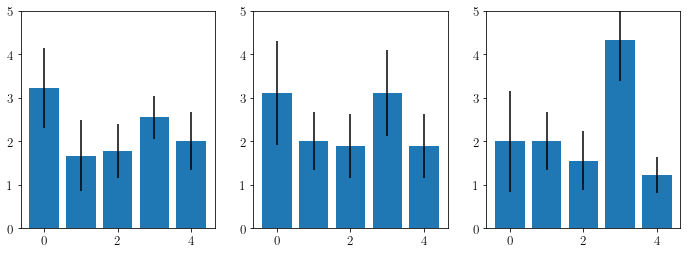

In [19]:
plt.figure(figsize=(16,4))

vals = []
errors = []

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
#     plt.title(s)
    plt.ylim(0, 5)
#     vals.append(means[1])
#     stds.append(stds[1])
#     vals.append(means[3:5])
#     errors.append(stds[3:5])
    vals.append([means[1], means[3], means[4]])
    errors.append([stds[1], stds[3], stds[4]])
#     stds.append([stds[3:5]])
    
print(vals)
print(errors)

In [20]:
vals

[[1.6666666666666667, 2.5555555555555554, 2.0],
 [2.0, 3.111111111111111, 1.8888888888888888],
 [2.0, 4.333333333333333, 1.2222222222222223]]

bgr


/Users/lis/Documents/github/Bidirectional_Interface/data_analysis_new/Surveys/../my_plots.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


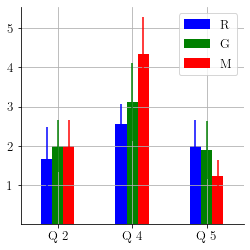

In [21]:
plt.figure(figsize=(4,4))
ax = plt.subplot(111)
my_plots.bar_multi(vals, errors, legend = ['R','G','M'], xlabels = ['Q 2', 'Q 4', 'Q 5'], xlim = [0.5,3.5], yticks = [1,2,3,4,5], w =0.15, save = True, where = 'hapt_NASA.pdf', colors = 'bgr')

# FINAL PLOTS

remote
{'How mentally demanding was the test?': [3.2222222222222223, 0.9162456945817024], 'How physically demanding was the test?': [1.6666666666666667, 0.8164965809277259], 'How hurried or rushed was the pace of the task?': [1.7777777777777777, 0.6285393610547089], 'How successful were you in accomplishing what you were asked to do?': [2.5555555555555554, 0.49690399499995325], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.0, 0.6666666666666666]}
[3.2222222222222223, 1.6666666666666667, 1.7777777777777777, 2.5555555555555554, 2.0]
[0.9162456945817024, 0.8164965809277259, 0.6285393610547089, 0.49690399499995325, 0.6666666666666666]
motion_NH
{'How mentally demanding was the test?': [3.111111111111111, 1.1967032904743342], 'How physically demanding was the test?': [2.0, 0.6666666666666666], 'How hurried or rushed was the pace of the task?': [1.8888888888888888, 0.7370277311900889], 'How successful were you in accomplishing what you were asked to do?': [3.111

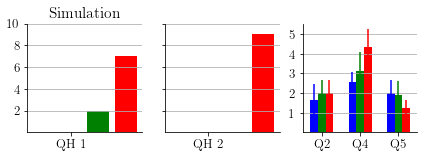

In [34]:
resp_data = {}

resp_data[easier] = Counter(data_sim[easier])
resp_data[prefered] = Counter(data_sim[prefered])

resp_data[easier]['Equivalent'] = 0
resp_data[easier]['Glove'] = 0
# resp_data[easier]['Remote'] = 0
resp_data[prefered]['Equivalent'] = 0
resp_data[prefered]['Remote'] = 0
resp_data[prefered]['Glove'] = 0

c1 = 'gray'
c2 = 'b'
c3 = 'g'
c4 = 'r'

c = [c1, c2, c3, c4]

qs = ['QH 1', 'QH 2']

fig = plt.figure(figsize = (7,2))
for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 3, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])
        
    t = options[2]
    options[2] = options[1]
    options[1] = t

    for idx, i in enumerate(options):
        plt.bar(1+idx, resp[idx], label = i, color = c[idx])
        
    plt.yticks([2,4,6,8,10])
    if jdx==1:
        plt.yticks([2,4,6,8,10], ['','','','',''])
    if jdx==0:
        plt.title('Simulation')  

    plt.grid()    
    plt.ylim(0,10)
    plt.xticks([2], [qs[jdx]])
#     plt.ylabel('Responses')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.grid()
    

vals = []
errors = []

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
#     ax = plt.subplot(141+idx)
    
#     ax.bar([0, 1, 2, 3, 4],
#        means,
#        yerr=stds)
#     plt.title(s)
#     plt.ylim(0, 5)
#     vals.append(means[1])
#     stds.append(stds[1])
#     vals.append(means[3:5])
#     errors.append(stds[3:5])
    vals.append([means[1], means[3], means[4]])
    errors.append([stds[1], stds[3], stds[4]])
#     stds.append([stds[3:5]])

ax = fig.add_subplot(133)
my_plots.bar_multi(vals, errors, ax = ax, xlabels = ['Q2', 'Q4', 'Q5'], xlim = [0.5,3.5], yticks = [1,2,3,4,5], w =0.2, save = True, where = 'hapt.pdf', colors = 'bgr')
ax.xaxis.grid()
savefig('hapt.pdf', bbox_inches='tight')


resp_data[haptics] = Counter(data_sim[haptics])
hapt_resp = []
for i in resp_data[haptics]:
    hapt_resp.extend([i]*resp_data[haptics][i])
    
print(hapt_resp)

print(np.mean(hapt_resp))
print(np.std(hapt_resp))

In [35]:
options

['Equivalent', 'Remote', 'Glove', 'Wearable']

In [29]:
print(resp_data)

{'Which interface was easier to use for the task?': Counter({'Wearable': 7, 'Remote': 2, 'Equivalent': 0, 'Glove': 0}), 'Which interface did you prefer?': Counter({'Wearable': 9, 'Equivalent': 0, 'Remote': 0, 'Glove': 0}), 'How useful was the haptic inteface?': Counter({10: 5, 8: 2, 7: 1, 9: 1})}


[7, 8, 9, 10]

In [30]:
sorted(resp_data[j])

[7, 8, 9, 10]

In [ ]:
resp_data